# Analysis of workloads disk IO operations of storage engines

## Functions for analyzing profiling

## Parsing mertrics profile log-file to retrieve disk IO reads and writes

Retrieving disk IO writes and reads from profile files from the metrics directory for each specific storage engine, workload and workload-size to

In [29]:
import os
import re

METRICS_DIRECTORY_PATH = '../metrics'
PROFILE_FILE_NAME = 'profile'

LOG_LINE_PATTERN_REGEX = r'^\s*\d\s+\d+\s+(W|R)\s+\d+.+$'

def gather_workload_disk_io(workload_type, workload_size, storage_engine):
    disk_io_profile_log_file_path = os.path.join(METRICS_DIRECTORY_PATH, storage_engine, workload_type, str(workload_size), PROFILE_FILE_NAME)

    profile_log_file = open(disk_io_profile_log_file_path, 'r')

    line_count = 0

    io = 0

    for log_line in profile_log_file:
        line_count += 1

        # Skipping the first line and empty lines
        if line_count == 1 or len(log_line.strip()) == 0:
            continue

        match = re.match(LOG_LINE_PATTERN_REGEX, log_line)

        if match is None:
            continue

        io += 1

    profile_log_file.close()

    return io

## Collect disk IO

Gathering disk IO information (reads and writes) for all workloads, workload-sizes and storage engines

In [30]:
def collect_disk_io_information(workload_types, workload_sizes, storage_engines):
    storage_engines_disk_io = {}

    for workload_type in workload_types:
        storage_engines_disk_io[workload_type] = {}

        for workload_size in workload_sizes:
            storage_engines_disk_io[workload_type][workload_size] = {}

            for storage_engine in storage_engines:
                storage_engines_disk_io[workload_type][workload_size][storage_engine] = gather_workload_disk_io(workload_type, workload_size, storage_engine)

    return storage_engines_disk_io

## Drawing a chart for comparison of a specific workload

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

def disk_io_chart_for(disk_io, workload_type, workload_sizes, storage_engines, storage_engine_names):
    count = 0

    plt.figure(figsize = (20, 10))

    for storage_engine in storage_engines:
        throughputs = [disk_io[workload_size][storage_engine] for workload_size in workload_sizes]

        plt.plot(workload_sizes, throughputs, label = storage_engine_names[count])

        count += 1

    plt.title(workload_type.capitalize() + ' workload disk IO comparison')
    plt.xlabel('Number of documents / Volume in KBs')
    plt.ylabel('Number of disk IO operations')
    plt.legend()

    plt.show()

## Disk IO operations profiling comparison charts

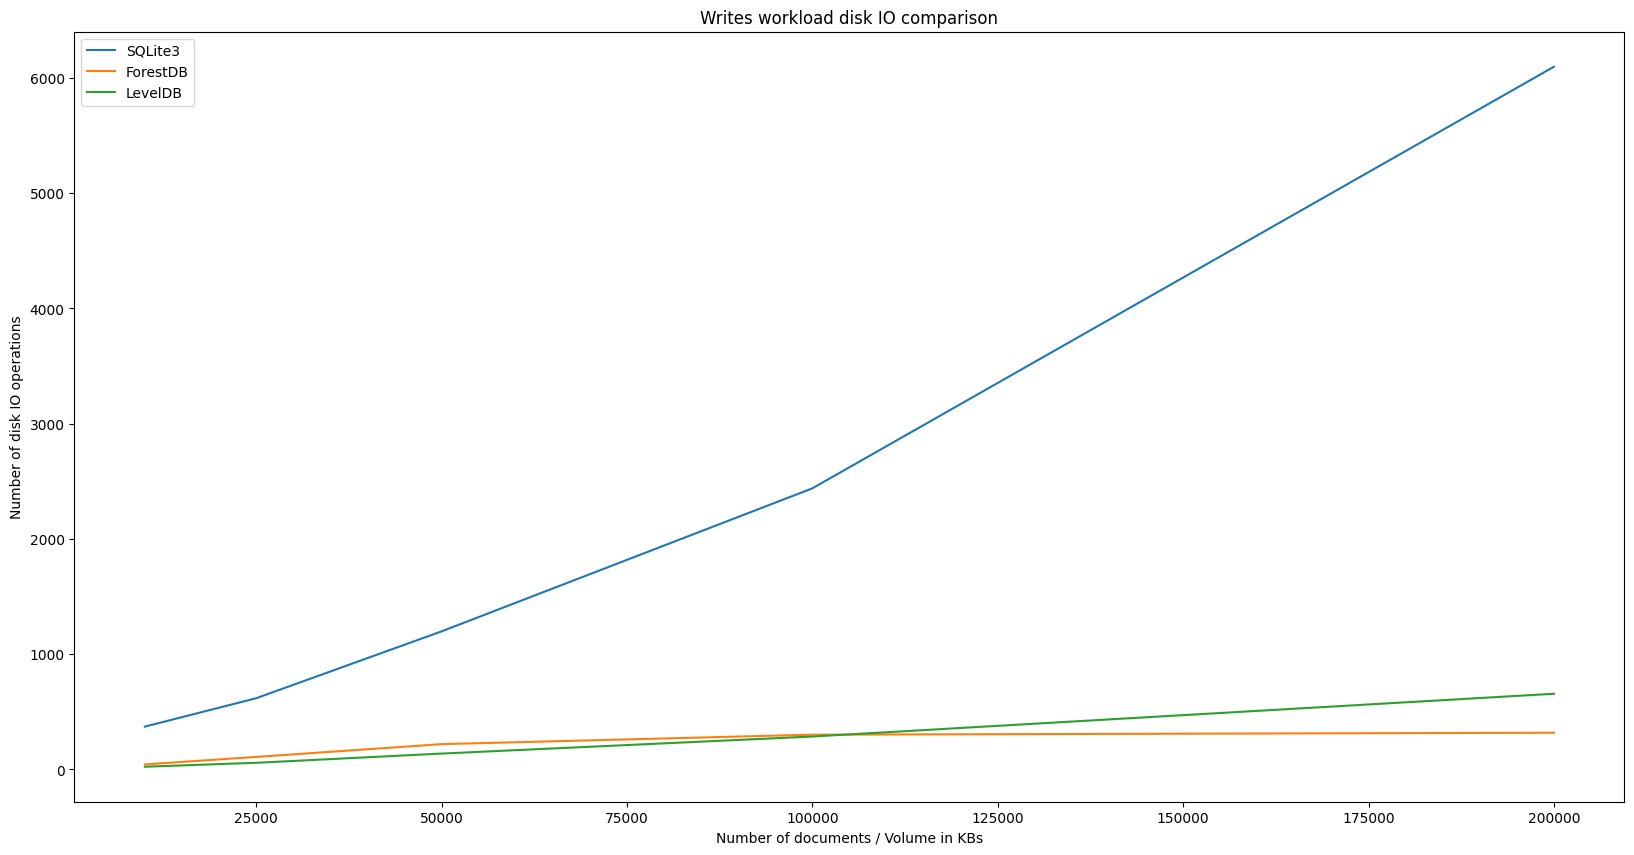

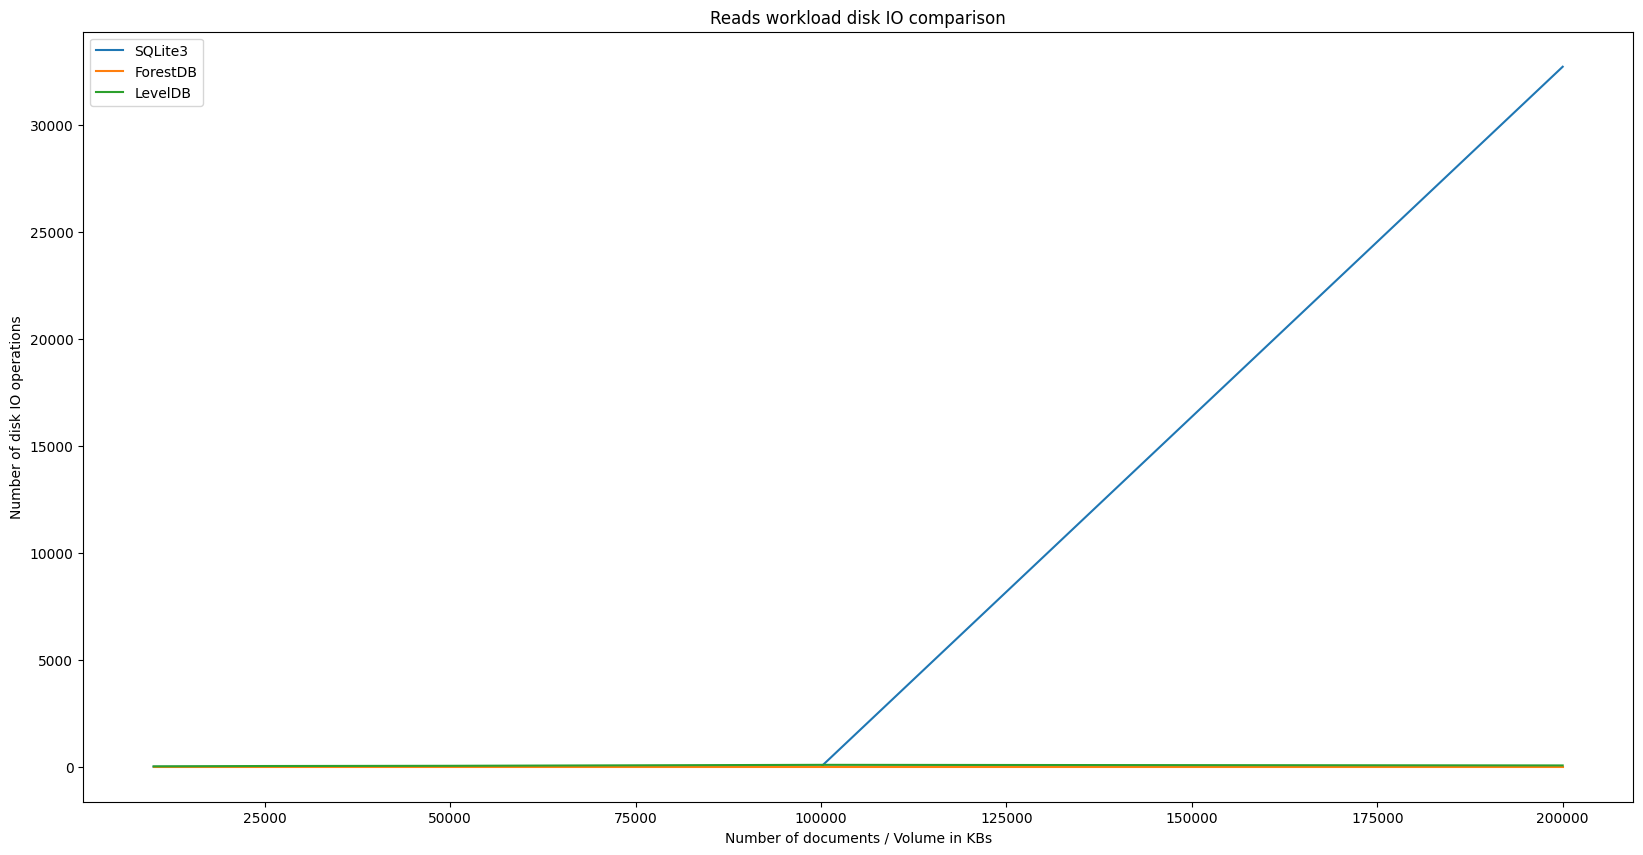

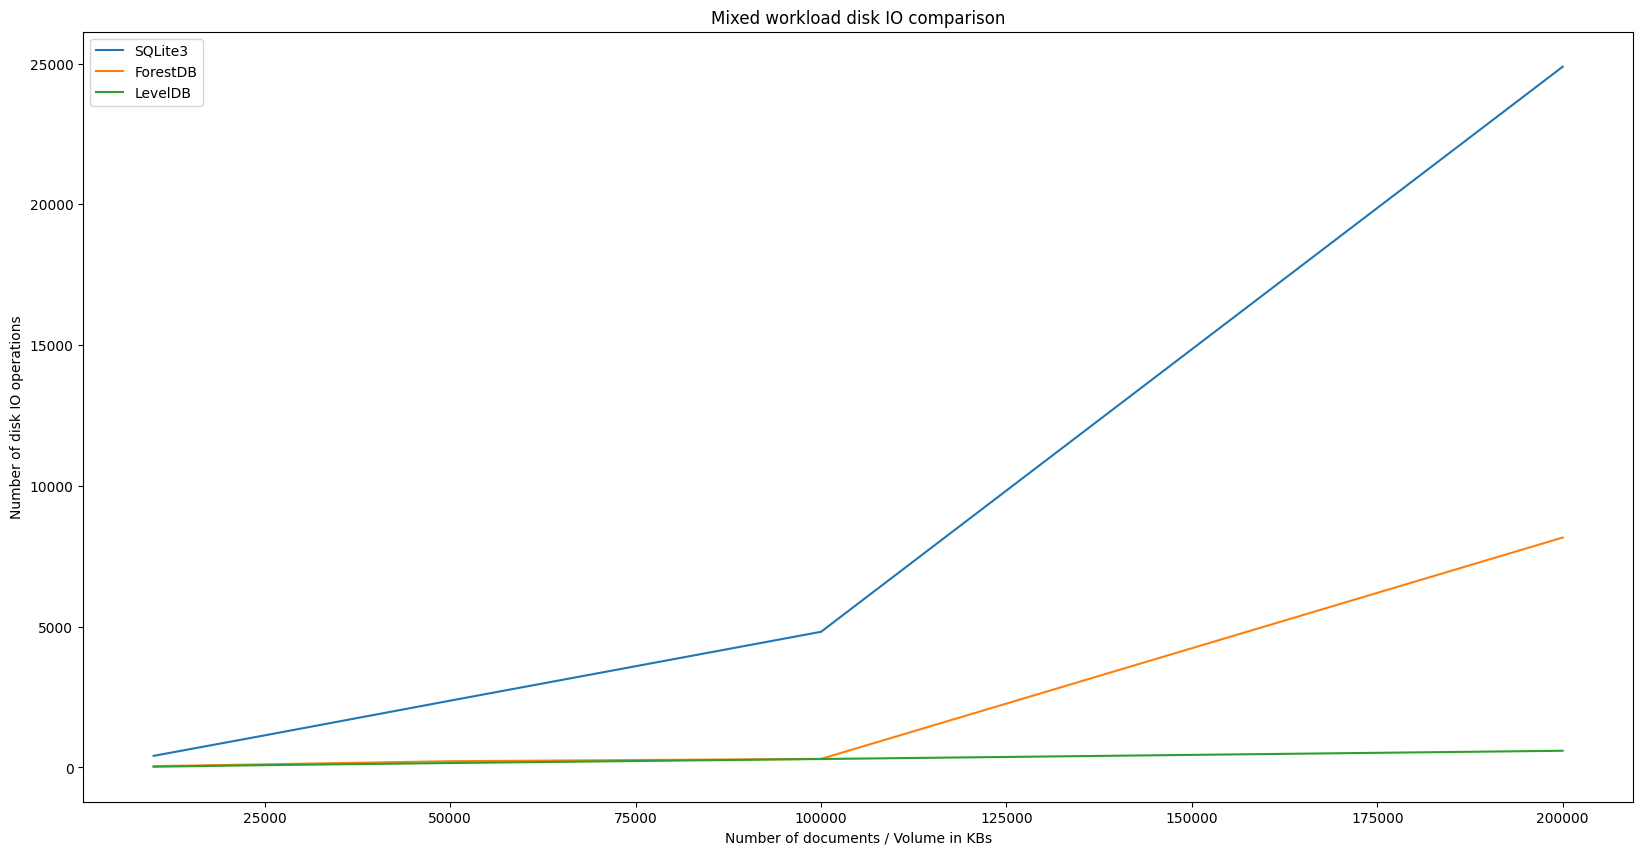

In [32]:
# Storage engines and workload sizes to analyze
# -----------------------------------------------------------------
# Types and names of storage engines
STORAGE_ENGINES = ['sqlite3', 'forestdb', 'leveldb']
STORAGE_ENGINE_NAMES = ['SQLite3', 'ForestDB', 'LevelDB']

# Workload settings
WORKLOAD_TYPES= ['writes', 'reads', 'mixed']  # Types of workloads to analyze and visualize
WORKLOAD_SIZES = [10000, 25000, 50000, 100000, 200000]  # Sizes of workloads (# of records / KBs - Each record is approx 1KB)

# Analyzing the logs / building profiles
# -----------------------------------------------------------------

disk_io = collect_disk_io_information(WORKLOAD_TYPES, WORKLOAD_SIZES, STORAGE_ENGINES)

# Drawing charts for comparison
# -----------------------------------------------------------------

for workload_type in WORKLOAD_TYPES:
    disk_io_chart_for(disk_io[workload_type], workload_type, WORKLOAD_SIZES, STORAGE_ENGINES, STORAGE_ENGINE_NAMES)